In [1]:
from mixprop.visc_pred_wrapper import visc_pred_single, visc_pred_T_curve, visc_pred_molfrac1_curve, visc_pred_read_csv

import matplotlib.pyplot as plt

/Users/cur5wz/opt/anaconda3/envs/pytorc_geo/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Input Arguments:
args = {'smi1': 'O',
        'smi2': 'c1ccccc1',
        'molfrac1': 0.25,
        'T': 298,
        'n_models':25,
        'threshold':0.022,
        'num_workers':0,
        'check_phase':False,
        'checkpoint_dir': 'pretrained_models/nist_dippr_model/nist_dippr_model',
        'input_path':'examples/example_input.csv',
        }

## 1. Make a prediction for a single datapoint.

In [3]:
# Usage:
# out = [viscosity (cp), reliability (bool)]

out = visc_pred_single(args)
print('Viscosity = {} cP'.format(out[0]))
print('Reliability = {}'.format(out[1]))

Loading models from /Users/cur5wz/Documents/BilodeauGroup/Projects/ViscosityModel/MixProp_static/mixprop/pretrained_models/nist_dippr_model/nist_dippr_model
Viscosity = 0.7624319876998925 cP
Reliability = True


## 2.  Make a prediction for a given pair of molecules at a range of temperatures at a fixed mole fraction.
*Note: Any temperature input will be ignored.

Loading models from /Users/cur5wz/Documents/BilodeauGroup/Projects/ViscosityModel/MixProp_static/mixprop/pretrained_models/nist_dippr_model/nist_dippr_model


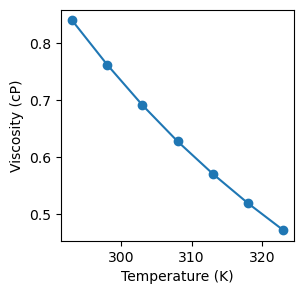

In [4]:
# Usage:
# out = [viscosity (cp), temperature (K), reliability (bool)]

out = visc_pred_T_curve(args)

plt.figure(figsize=(3,3),dpi=100)
plt.plot(out[1],out[0],marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('Viscosity (cP)')
plt.show()

## 3. Make a prediction for a given pair of molecules at a range of mole fractions, but at a fixed temperature.
*Note: Any mole fraction input will be ignored.

Loading models from /Users/cur5wz/Documents/BilodeauGroup/Projects/ViscosityModel/MixProp_static/mixprop/pretrained_models/nist_dippr_model/nist_dippr_model


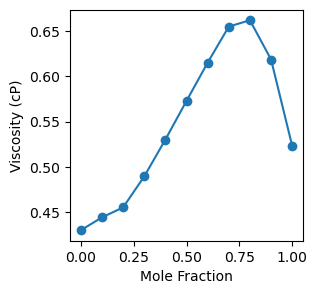

In [5]:
# Usage:
# out = [viscosity (cp), mole fraction, reliability (bool)]
out = visc_pred_molfrac1_curve(args)

plt.figure(figsize=(3,3),dpi=100)
plt.plot(out[1],out[0],marker='o')
plt.xlabel('Mole Fraction')
plt.ylabel('Viscosity (cP)')
plt.show()

## 4. Make a prediction for a set of datapoints specified in a csv file defined using the input_path argument.
*Note: Inputs not used (smi1, smi2, molfrac1, T) will be ignored. The csv file should consist of four columns in the following order: SMILES 1, SMILES 2, Mole Fraction, and Temperature. Columns should have headers.

In [6]:
# Usage:
# out = [viscosity (cp), mole fraction, dataframe]
# dataframe contains a pandas dataframe with predictions and reliability values
# added in columns to the end of the csv input file.

out = visc_pred_read_csv(args)
out[-1]

Loading models from /Users/cur5wz/Documents/BilodeauGroup/Projects/ViscosityModel/MixProp_static/mixprop/pretrained_models/nist_dippr_model/nist_dippr_model


,smi1,smi2,molfrac1,T,Viscoisty Predictions,Reliability
0,O,CCO,0.3,298,1.630975,True
1,O,CCO,0.4,298,1.783443,True
2,O,CCO,0.8,303,1.698964,True
